### Q1. Install and load the latest versions of TensorFlow and Keras. Print their versions.

In [27]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [25]:
pip install optree


Note: you may need to restart the kernel to use updated packages.


In [1]:
import tensorflow as tf

# Print TensorFlow version
print("TensorFlow version:", tf.__version__)

# Keras is included within TensorFlow
from tensorflow.keras import __version__ as keras_version

# Print Keras version
print("Keras version:", keras_version)


2024-08-04 14:24:18.454508: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 14:24:18.460532: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-04 14:24:18.479870: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 14:24:18.511451: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 14:24:18.520964: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-04 14:24:18.545396: I tensorflow/core/platform/cpu_feature_gu

TensorFlow version: 2.17.0
Keras version: 3.4.1


## Q2. Load the Wine Quality dataset and explore its dimensions.

#### Dataset link: https://www.kaggle.com/datasets/nareshbhat/wine-quality-binary-classification

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv("wine.csv")

# Explore dimensions
print("Dataset dimensions:", data.shape)
data.head()

Dataset dimensions: (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


## Q3. Check for null values, identify categorical variables, and encode them.

In [5]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
data["quality"].unique()

array(['bad', 'good'], dtype=object)

####  no null values
#### Quality column is categorial.

In [7]:
## Encoding
data['quality']=np.where(data['quality'].str.contains("bad"),0,1)

In [8]:
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

### Q4. Separate the features and target variables from the dataset.

In [9]:
# Independent and dependent Variables
X=data.drop('quality',axis=1)
y=data['quality']

In [10]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [11]:
y

0       0
1       0
2       0
3       1
4       0
       ..
1594    0
1595    1
1596    1
1597    0
1598    1
Name: quality, Length: 1599, dtype: int64

### Q5. Perform a train-test split, dividing the data into training, validation, and test datasets.

In [12]:
from sklearn.model_selection import train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


### Q6. Scale the dataset using an appropriate scaling technique.

In [13]:
from sklearn.preprocessing import StandardScaler
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform all sets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


### Q7. Design and implement at least two hidden layers and an output layer for the binary categorical variables.

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Q9. Print the summary of the model architecture.

In [15]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

### Q10. Set the loss function(‘binary_crossentropy’), optimizer, and include the accuracy metric in the model.
### Q11. Compile the model with the specified loss function, optimizer, and metrics.

In [16]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)


### Q12. Fit the model to the training data using appropriate batch size and number of epochs.

In [17]:
history = model.fit(
    X_train_scaled, y_train,
    epochs=20,  # Adjust based on needs
    batch_size=32,
    validation_data=(X_val_scaled, y_val)
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5084 - loss: 0.7202 - val_accuracy: 0.6914 - val_loss: 0.6080
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7213 - loss: 0.5537 - val_accuracy: 0.7188 - val_loss: 0.5621
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7366 - loss: 0.5201 - val_accuracy: 0.7461 - val_loss: 0.5440
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7367 - loss: 0.5141 - val_accuracy: 0.7422 - val_loss: 0.5401
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7313 - loss: 0.5081 - val_accuracy: 0.7500 - val_loss: 0.5360
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7507 - loss: 0.4874 - val_accuracy: 0.7617 - val_loss: 0.5326
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7317 - loss: 0.5111 - val_accuracy: 0.7773 - val_loss: 0.5326
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7579 - loss: 0.4886 - val_accuracy: 0.7695 - val_loss:

### Q13. Obtain the model's parameters (weights and biases).

In [18]:
weights = model.get_weights()
print("Model weights and biases:", weights)


Model weights and biases: [array([[ 0.06642915,  0.10818976,  0.06331846, -0.14251095,  0.15252997,
        -0.09405292, -0.13189769,  0.10495654, -0.24561866,  0.05555776,
         0.08415487, -0.13953045,  0.18495615,  0.03630647, -0.17730458,
         0.09667142, -0.07183762,  0.15079258,  0.16311301,  0.21247098,
         0.06767232, -0.08424287, -0.05041287, -0.18101533, -0.03289685,
        -0.2908496 ,  0.13745126,  0.08227709,  0.12873624,  0.19973107,
        -0.03749513,  0.07934983, -0.2974784 , -0.01699808, -0.08372051,
        -0.11549035, -0.18006127, -0.23118001,  0.22622445, -0.14941971,
         0.17592226, -0.11481085, -0.18624005,  0.24906386, -0.17986302,
         0.3008456 , -0.3275863 , -0.09163113,  0.18365383, -0.11452226,
         0.18905199, -0.30262896, -0.24091269,  0.13379385, -0.01031498,
         0.1928447 ,  0.06903426,  0.05855478,  0.27967742,  0.26339534,
        -0.0787179 ,  0.22635345,  0.2678342 ,  0.09923371],
       [-0.42392305,  0.13432415, -0

### Q14. Store the model's training history as a Pandas DataFrame.

In [19]:
history_df = pd.DataFrame(history.history)
print(history_df.head())


   accuracy      loss  val_accuracy  val_loss
0  0.589443  0.666396      0.691406  0.607957
1  0.720430  0.554406      0.718750  0.562125
2  0.731183  0.525280      0.746094  0.543959
3  0.739980  0.511569      0.742188  0.540094
4  0.737048  0.502373      0.750000  0.536034


### Q15. Plot the training history (e.g., accuracy and loss) using suitable visualization techniques.

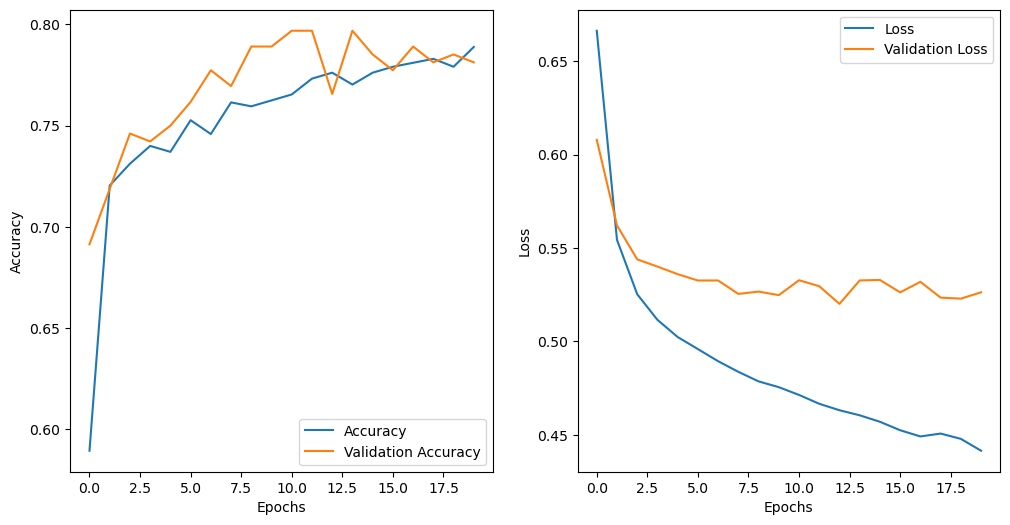

In [20]:
import matplotlib.pyplot as plt

# Plot accuracy and loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_df['accuracy'], label='Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_df['loss'], label='Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


### Q16. Evaluate the model's performance using the test dataset and report relevant metrics.

In [25]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7366 - loss: 0.4856 
Test Loss: 0.4938887655735016
Test Accuracy: 0.737500011920929
